# Intro to pandas
This is an introductory notebook on the Python `pandas` module, where you can learn the basics of data transformation, manipulation and cleaning. The examples shown will be based on an [Online Shopping Dataset](https://www.kaggle.com/datasets/jacksondivakarr/online-shopping-dataset) from [Kaggle](https://www.kaggle.com). Kaggle is an online platform for data scientists (new or experienced), where you can take part in various [competitions](https://www.kaggle.com/competitions), find [datasets](https://www.kaggle.com/datasets)(like the one we'll be using), [learn](https://www.kaggle.com/learn) Python modules, SQL and more useful tools for ML, Data Science etc. and much more! Also some examples will be adapted from the official [pandas](https://pandas.pydata.org) documentation (make sure you check it out when you have problems!), and from [Python for Data Analysis, 3E](https://wesmckinney.com/book/) by Wes McKinney. In this guide, as well as in next ones, we'll be utilizing Jupyter Notebooks or .ipynb files (Interactive Python Notebook). These allow us to write python code and explain what is happening using markdown. For more details on how to write markdown, please visit this [resource](https://www.markdownguide.org/cheat-sheet/).

---

> Kostas Riganas <br />
> IT & Data Lead <br />
> UniAI <br />
> kriganas@uniai.gr


## What is pandas?
`pandas` is an open source data analysis and manipulation tool built on top of the Python Programming Language. Library highlights:
* A fast and efficient **DataFrame** object for data manipulation with integrated indexing.
* Tools for **reading and writing data** between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases etc.
* Intelligent **data alignment** and integrated handling of **missing data**: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form.
* Flexible **reshaping** and pivoting of data sets.
* Intelligent label-based **slicing**, **fancy indexing**, and **subsetting** of large data sets
* Columns can be inserted and deleted from data structures for **size mutability**.
* Aggregating or transforming data with a powerful **group by** engine allowing split-apply-combine operations on data sets.
* High performance **merging and joining** of data sets.
* **Hierarchical axis indexing** provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure.
* **Time series**-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data.
* Highly **optimized for performance**, with critical code paths written in Cython or C.
* Python with *pandas* is in use in a wide variety of **academic and commercial** domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

## About the dataset
This dataset contains data about an online shop. Below are the columns included in the dataset along with their data type (dtype) and a short description:
* **CustomerID** (dtype: *int*): Unique identifier for each customer.
* **Gender** (dtype: *str*): Gender of the customer (e.g., Male, Female).
* **Location** (dtype: *str*): Location or address information of the customer.
* **Tenure_Months** (dtype: *int*): Number of months the customer has been associated with the platform.
* **Transaction_ID** (dtype: *int*): Unique identifier for each transaction.
* **Transaction_Date** (dtype: *date*): Date of the transaction.
* **Product_SKU** (dtype: *str*): Stock Keeping Unit (SKU) identifier for the product.
* **Product_Description** (dtype: *str*): Description of the product.
* **Product_Category** (dtype: *str*): Category to which the product belongs.
* **Quantity** (dtype: *int*): Quantity of the product purchased in the transaction.
* **Avg_Price** (dtype: *float*): Average price of the product.
* **Delivery_Charges** (dtype: *float*): Charges associated with the delivery of the product.
* **Coupon_Status** (dtype: *str*): Status of the coupon associated with the transaction.
* **GST** (dtype: *float*): Goods and Services Tax associated with the transaction.
* **Date** (dtype: *date*): Date of the transaction (potentially redundant with Transaction_Date).
* **Offline_Spend** (dtype: *float*): Amount spent offline by the customer.
* **Online_Spend** (dtype: *float*): Amount spent online by the customer.
* **Month** (dtype: *str*): Month of the transaction.
* **Coupon_Code** (dtype: *str*): Code associated with a coupon, if applicable.
* **Discount_pct** (dtype: *float*): Percentage of discount applied to the transaction.

## Starting Off
In this section we'll get acquainted with pandas, importing the library, creating Series and DataFrame objects from scratch, showcasing the basic elements of both, such as index, columns, dtypes etc.

To import the pandas module you only have to do:
```python
import pandas as pd
```
**pd** is the convention name given to *pandas* when you use it.

In [1]:
import pandas as pd

### pd.Series
`Series` is one of the 2 basic objects in pandas. You can think of it as 1-dimensional array that has labels. You can construct it in various ways as you can also see in the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).

One way is through a dictionary:

In [2]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])  # construct a pd.Series object using a dictionary
ser

a    1
b    2
c    3
dtype: int64

In [3]:
ser2 = pd.Series(data=d, index=['x', 'y', 'z'])  # see how this series is null since the index doesn't match the dictionary's keys.
ser2

x   NaN
y   NaN
z   NaN
dtype: float64

You can also create `Series` from lists, as in the example below:

In [4]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

As you saw earlier we can pass the `index` parameter to specify index labels.

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

#### Indexing
Using the `.index` accessor we can take a look into the Series index labels.

In [6]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

You can access specific labels, by using a label like in a dictionary:

In [7]:
obj2['a']

-5

You can also **slice** a Series using a **subset** of those index labels in **any order** you want.

In [8]:
obj2[['a', 'b']]

a   -5
b    7
dtype: int64

Two very important accessors, which are much more useful in DataFrame objects, are `.loc` and `.iloc`. `.loc` lets you access index labels in a much safer and conventional way. `iloc` lets you access your data using their integer location.

In [9]:
obj2.loc['a']

-5

In [10]:
obj2.loc[['a', 'b']]

a   -5
b    7
dtype: int64

In [11]:
obj2.iloc[2]

-5

If you have **integer labels** or you are using **iloc**, you can also use **slicers** as you normally do in basic Python. For the next example we will be using [numpy](https://numpy.org) as well. `numpy` is a Python open-source library enabling users to do **numerical computing**. It provides many mathematical functions (logarithmic, exponential, trigonometric and so much more), fast computations, and has its own data structure called [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). If you have numpy installed, you can import it as `import numpy as np`. **np** is the conventional name for numpy.

In [12]:
import numpy as np

In [13]:
april = pd.Series(np.random.normal(0, 5, 30), index=pd.date_range(start='4/1/2024', periods=30, freq='d'))
april

2024-04-01     7.752281
2024-04-02     9.456215
2024-04-03     7.990507
2024-04-04     1.190208
2024-04-05     2.536972
2024-04-06    -1.655994
2024-04-07     9.337115
2024-04-08    -5.265317
2024-04-09     7.264867
2024-04-10    -4.093273
2024-04-11     1.854437
2024-04-12    10.949663
2024-04-13     6.816539
2024-04-14     3.031188
2024-04-15     7.791894
2024-04-16     5.439321
2024-04-17    -1.906963
2024-04-18    -6.780938
2024-04-19    -5.010426
2024-04-20    -2.732934
2024-04-21     5.123472
2024-04-22    -0.477577
2024-04-23    -6.019398
2024-04-24     2.723291
2024-04-25     1.502793
2024-04-26     1.769191
2024-04-27     3.642780
2024-04-28     1.835653
2024-04-29    -0.337380
2024-04-30    -1.324326
Freq: D, dtype: float64

In [14]:
april.iloc[5:14]

2024-04-06    -1.655994
2024-04-07     9.337115
2024-04-08    -5.265317
2024-04-09     7.264867
2024-04-10    -4.093273
2024-04-11     1.854437
2024-04-12    10.949663
2024-04-13     6.816539
2024-04-14     3.031188
Freq: D, dtype: float64

You can also assign values if you want

In [15]:
april['2024-04-10'] = 1.34

#### Operations
You can also do various operations, like numerical or boolean, using numpy as well.

In [16]:
obj2[obj2 > 0]

d    4
b    7
c    3
dtype: int64

In [17]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [18]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

#### Existing (and not) nulls
Let's create a new Series object

In [19]:
sdata = {"Ohio": 35000, "Texas": 71000, "Oregon": 16000, "Utah": 5000}
obj3 = pd.Series(sdata)
states = ["California", "Ohio", "Oregon", "Texas"]
obj4 = pd.Series(obj3, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We created a Series object from another Series object, and we passed a list of our wanted index labels. The `California` label doesn't exist in the original Series, therefore its value is `NaN` (not a number). We can see if there are null elements using the `isna` method.

In [20]:
obj4.isna()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

If we also apply the `sum` method, we can get the **total number of null values**.

In [21]:
obj4.isna().sum()

1

The `notna` method is used to check if a value is **not null**.

In [22]:
obj4.notna()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

These boolean values can be used as **slicers** to get data more specifically. Let's say we want to get the data where the state's value is not null.

In [23]:
obj4.loc[obj4.notna()]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

#### Operations between Series objects
Since Series use `ndarray` objects, this means that you can do operations like addition or multiplication between them. The operations use the Series objects' index labels to do the job, therefore if there isn't a match then the result is `NaN`. The same is applied if we have null values: `NaN` + scalar_value cannot give a number obviously!

In [24]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

#### Name and index.name
You can give a name to your series **internally**. For example, let's say our april series is the percentage change of a stock, and the index is the date.

In [25]:
april.name = 'stock'
april.index.name = 'date'
april

date
2024-04-01     7.752281
2024-04-02     9.456215
2024-04-03     7.990507
2024-04-04     1.190208
2024-04-05     2.536972
2024-04-06    -1.655994
2024-04-07     9.337115
2024-04-08    -5.265317
2024-04-09     7.264867
2024-04-10     1.340000
2024-04-11     1.854437
2024-04-12    10.949663
2024-04-13     6.816539
2024-04-14     3.031188
2024-04-15     7.791894
2024-04-16     5.439321
2024-04-17    -1.906963
2024-04-18    -6.780938
2024-04-19    -5.010426
2024-04-20    -2.732934
2024-04-21     5.123472
2024-04-22    -0.477577
2024-04-23    -6.019398
2024-04-24     2.723291
2024-04-25     1.502793
2024-04-26     1.769191
2024-04-27     3.642780
2024-04-28     1.835653
2024-04-29    -0.337380
2024-04-30    -1.324326
Freq: D, Name: stock, dtype: float64

There are many more things to learn about pd.Series, so make sure to check out the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) if you want to see the possibilities and learn how to use them.

### pd.DataFrame
`DataFrame` is the second main data structure in `pandas`. You can think of it as table, with *rows* (named index) and *columns* (actually named columns). In essence, a DataFrame is a **collection of Series** objects, each with different data type. They will become clearer through examples.

In [26]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


Above you can see a basic way of constructing a DataFrame using a **dictionary**. As mentioned, this DataFrame is a collection of Series, each with a different data type (dtype). To access `dtypes`, you can use the `.dtypes` accessor.

In [27]:
frame.dtypes

state     object
year       int64
pop      float64
dtype: object

To learn more about `dtypes` you can check the following [resource](https://pbpython.com/pandas_dtypes.html).

#### Taking a look at the start or end of the data
`pandas` offers useful methods to quickly take a look into their basic data structures. `head` returns the first n rows (if not specified, then n=5), and `tail` the last n rows (n=5 if not specified).

In [28]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [29]:
frame.tail(3)

,state,year,pop
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


#### Columns and Indices
You can also create a DataFrame using **another DataFrames**, and change the order of the columns. If new columns don't have values, then the DataFrame will contain **null values**.

In [30]:
frame2 = pd.DataFrame(data, columns=["year", "state", "pop", "debt"])
frame2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


To access columns and indices, you simply use the accessors `.columns` and `.index` respectively.

In [31]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [32]:
frame2.index

RangeIndex(start=0, stop=6, step=1)

#### Accessing values
Accessing columns and indices in DataFrames is interesting. You can use the dot accessor to get a column or use the brackets as well.

In [33]:
frame2.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [34]:
frame2['state']

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object

You can also get a subset of columns, giving a list:

In [35]:
frame2[['pop', 'year']]

,pop,year
0,1.5,2000
1,1.7,2001
2,3.6,2002
3,2.4,2001
4,2.9,2002
5,3.2,2003


You can also utilize the `loc` and `iloc` accessors as previously, where the *first part* refers to the **index**, whereas the second to the **columns**.

In [36]:
frame2.loc[[0, 3]]

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
3,2001,Nevada,2.4,NaN


In [37]:
frame2.loc[3:1:-1, 'year']

3    2001
2    2002
1    2001
Name: year, dtype: int64

In [38]:
frame2.loc[5, ['pop', 'state']]

pop         3.2
state    Nevada
Name: 5, dtype: object

In [39]:
frame2.iloc[0:4, 3:1:-1]

,debt,pop
0,NaN,1.5
1,NaN,1.7
2,NaN,3.6
3,NaN,2.4


Using `:` returns **all rows** if placed in the first part, or **all columns** if placed in the second part.

In [40]:
frame2.iloc[:, [0, 2]]

,year,pop
0,2000,1.5
1,2001,1.7
2,2002,3.6
3,2001,2.4
4,2002,2.9
5,2003,3.2


In [41]:
frame2.iloc[[5, 1, 2, 4], :]

,year,state,pop,debt
5,2003,Nevada,3.2,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
4,2002,Nevada,2.9,NaN


Now these are some of the very basics of DataFrames. We haven't focused much on them since we will be using them a lot in the examples.

## Online Shopping Dataset
Since we saw the very basics, let's take a look into how we can use `pandas` to do data analysis. Mostly you will be **importing data**, rather than creating your own. Luckily, `pandas` has many methods creating DataFrames using popular file types, such as CSV, Spreadsheet files, JSON, and even get data from a Database. On Kaggle, the dataset has both a csv and an xlsx file, so we will showcase those 2 different ways of importing data.

In [42]:
sales = pd.read_excel('data/online-retail.xlsx', index_col='Unnamed: 0', parse_dates=['Transaction_Date', 'Date'])

In [43]:
sales = pd.read_csv('data/online-retail.csv', index_col='Unnamed: 0', parse_dates=['Transaction_Date', 'Date'])

Both functions, as well as the other *reader* functions, have dozens of parameters to **customize the import process**. For example, the delimiter might be the symbol '|', therefore in `read_csv` you can change the delimiter using the respective parameter. You might have a spreadsheet containing multiple sheets, therefore you have to specify the sheet you want to use in such cases. So it is highly recommended to check the documentation of the function you want to use to get the **most** out of it.

In [44]:
sales.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,2019-01-01,4500.0,2424.5,1,ELEC10,10.0


In [45]:
sales.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months', 'Transaction_ID',
       'Transaction_Date', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'GST', 'Date', 'Offline_Spend', 'Online_Spend',
       'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

When we imported our data, we specified which columns are **dates**.

In [46]:
sales.dtypes

CustomerID                    float64
Gender                         object
Location                       object
Tenure_Months                 float64
Transaction_ID                float64
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                      float64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
GST                           float64
Date                   datetime64[ns]
Offline_Spend                 float64
Online_Spend                  float64
Month                           int64
Coupon_Code                    object
Discount_pct                  float64
dtype: object

### Handling Missing Data
Let's take a look into how many **null values** we have:

In [47]:
sales.isna().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

Since we operate with shopping data, we should exclude data that don't refer to a transaction. In this case we will use the [`dropna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) method. As its name implies, it will leave out data containing null values. You can customize the function call in many ways. You can specify if it will drop data **by rows** (axis=0 or axis='index') or **by columns** (axis=1 or axis='columns'), **how** they will drop (if all values in a row or columns are null or if at least one null value exist), drop with a **threshold** (if there are at least n null values then drop rows or columns, cannot be combined with how), or even with a **subset of rows or columns** (rows if you are dropping columns and columns if you are dropping rows). `inplace=True` indicates that it will store the changes in the **same DataFrame**, otherwise it will return a **new one**. In this case we will drop **all rows** in which *Transaction_ID* is *null* and then store it in the same DataFrame.

In [48]:
sales.dropna(subset='Transaction_ID', inplace=True)

In [49]:
sales.tail(10)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52914,14031.0,F,Chicago,17.0,19075.0,2019-01-29,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1.0,51.57,6.5,Clicked,0.10,2019-01-29,700.0,836.13,1,ACC10,10.0
52915,15002.0,M,Chicago,41.0,23797.0,2019-03-22,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Clicked,0.05,2019-03-22,2000.0,2523.41,3,GC30,30.0
52916,15002.0,M,Chicago,41.0,23798.0,2019-03-22,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2019-03-22,2000.0,2523.41,3,GC30,30.0
52917,15002.0,M,Chicago,41.0,23799.0,2019-03-22,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Clicked,0.05,2019-03-22,2000.0,2523.41,3,GC30,30.0
52918,15002.0,M,Chicago,41.0,23800.0,2019-03-22,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Clicked,0.05,2019-03-22,2000.0,2523.41,3,GC30,30.0
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,2019-03-10,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,2019-03-28,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,2019-10-06,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,2019-10-06,3000.0,2230.76,10,NJ10,10.0
52923,13659.0,F,Chicago,8.0,39998.0,2019-10-06,GGOEGOCC077999,Google Spiral Journal with Pen,Notebooks & Journals,1.0,5.59,6.5,Not Used,0.05,2019-10-06,3000.0,2230.76,10,NJ10,10.0


We also saw that there are missing data in `Coupon_Code` and `Discount_pct`. We should somehow handle them. As it is always the case, we must consider the business strategy on how to handle them. Some might say that we could drop them, or fill them in some way. In this case, we can fill them with a value. We can do that with the `fillna` method. There are **many** methods we can use to fill in those missing data. From simple things such as giving a single value, to even more complicated methods such as interpolation or regression algorithms. Nevertheless, since there isn't any reason to do something complicated in this case, we can practically assign a single value like 'NOCOUP0' to the `Coupon_Code` and 0 to `Discount_pct`.

In [50]:
sales.fillna({
    'Coupon_Code': 'NOCOUP0',
    'Discount_pct': 0.0
}, inplace=True)

In [51]:
sales.loc[:, ['Coupon_Code', 'Discount_pct']].isna().sum()

Coupon_Code     0
Discount_pct    0
dtype: int64

### Descriptive Statistics
`pandas` offers all sorts of statistical functions, such as `mean` for the average, `std` for standard deviation, and so on and so forth. Be careful **NOT to apply** function on the wrong data types. Usually you should **separate** the arithmetic columns and the categorical columns if you want to apply a statistical function.

In [52]:
sales.Quantity.mean()

4.497638122590885

In [53]:
sales.Avg_Price.median(), sales.Avg_Price.var()

(16.99, 4096.880891960912)

In [54]:
sales.loc[:, ['Offline_Spend', 'Online_Spend']].apply(['mean', 'std'])

,Offline_Spend,Online_Spend
mean,2830.914141,1893.109119
std,936.154247,807.014092


With `apply`, you can give several functions, or/and even custom ones, and apply it to the DataFrame or the subset of columns in the DataFrame. But doing all of this to just get some statistics is a bit of a fuss. Fortunately, `pandas` provides a method that can **quickly** give us an idea of what's happening, using the `describe` method.

In [55]:
sales.describe()

,CustomerID,Tenure_Months,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges,GST,Date,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924,52924.000000,52924.000000,52924.000000,52924.000000,52924,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,26.127995,32409.825675,2019-07-05 19:16:09.450533120,4.497638,52.237646,10.517630,0.137462,2019-07-05 19:16:09.450533120,2830.914141,1893.109119,6.652388,19.802358
min,12346.00000,2.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000,0.050000,2019-01-01 00:00:00,500.000000,320.250000,1.000000,0.000000
25%,13869.00000,15.000000,25384.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000,0.100000,2019-04-12 00:00:00,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,2019-07-13 00:00:00,1.000000,16.990000,6.000000,0.180000,2019-07-13 00:00:00,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2019-09-27 00:00:00,2.000000,102.130000,6.500000,0.180000,2019-09-27 00:00:00,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000,0.180000,2019-12-31 00:00:00,5000.000000,4556.930000,12.000000,30.000000
std,1766.55602,13.478285,8648.668977,NaN,20.104711,64.006882,19.475613,0.045825,NaN,936.154247,807.014092,3.333364,8.278878


You can also use `describe` on categorical columns, which obviously have different statistics.

In [56]:
sales.loc[:, ['Product_Category', 'Coupon_Status', 'Coupon_Code']].describe()

,Product_Category,Coupon_Status,Coupon_Code
count,52924,52924,52924
unique,20,3,46
top,Apparel,Clicked,SALE20
freq,18126,26926,6373


Other methods you can use that give you useful insight are `unique` and `value_counts`. `unique` returns an **array of unique values**. `value_counts` returns a Series with the **unique values** as the labels and the **number of occurences** as values.

In [57]:
sales['Product_Category'].unique()

array(['Nest-USA', 'Office', 'Apparel', 'Bags', 'Drinkware', 'Lifestyle',
       'Waze', 'Headgear', 'Fun', 'Notebooks & Journals', 'Google',
       'Nest-Canada', 'Bottles', 'Gift Cards', 'More Bags', 'Backpacks',
       'Housewares', 'Android', 'Nest', 'Accessories'], dtype=object)

In [58]:
sales['Product_Category'].value_counts()

Product_Category
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

Note that when we used `describe`, the top product category was Apparel with 18126 occurences.

### Dropping and renaming columns

Sometimes a dataset might contain columns that are not necessary for analysis, and you would like to throw them away. For this case, pandas provides the `drop` method allowing you to drop rows or columns depending on the index (again, playing with the *axis* parameter). There are also `index` and `columns` parameters to make things easier. In this case we have the number of month which isn't that useful (it can be, but let's say it's not), and therefore we can drop it. We can also drop `Date` since it is actually `Transaction_Date`.

In [59]:
sales.drop(columns=['Month', 'Date'], inplace=True)
sales.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0


Let's say that due to conventions, we have to keep the column names in lower case. We can use the `rename` method to change the name of **index** or **column labels** in various ways. One is to use a **dictionary** and explicitly define the new names, another one is to use a **defined function**, a **lambda function** etc.

In [60]:
sales.rename(lambda x: x.lower(), axis=1, inplace=True)
sales.columns

Index(['customerid', 'gender', 'location', 'tenure_months', 'transaction_id',
       'transaction_date', 'product_sku', 'product_description',
       'product_category', 'quantity', 'avg_price', 'delivery_charges',
       'coupon_status', 'gst', 'offline_spend', 'online_spend', 'coupon_code',
       'discount_pct'],
      dtype='object')

In [61]:
sales.rename(columns={'customerid': 'customer_id'}, inplace=True)

### Dealing with str columns (Series)
Similarly to Python strings, you can do many things with str columns in `pandas`. Those columns as we have said are actually `Series` objects. We also saw that we can transform values of column names to lowercase. Behind the scenes, it was in way, applying a function on a `Series` with the **object dtype**. `pandas` uses by default the object data type, however they **recommend using** their own `StringDtype`, which is still experimental though. You can learn more [here](https://pandas.pydata.org/docs/user_guide/text.html).

Let's take a look once more into the dtypes

In [62]:
sales.dtypes

customer_id                   float64
gender                         object
location                       object
tenure_months                 float64
transaction_id                float64
transaction_date       datetime64[ns]
product_sku                    object
product_description            object
product_category               object
quantity                      float64
avg_price                     float64
delivery_charges              float64
coupon_status                  object
gst                           float64
offline_spend                 float64
online_spend                  float64
coupon_code                    object
discount_pct                  float64
dtype: object

All of these object can be considered strings. We will use another method to explicitly cast them as `pd.StringDtype`, introducing `astype`.

In [63]:
columns = ['gender', 'location', 'product_sku', 'product_description', 'product_category', 'coupon_status', 'coupon_code']
sales = sales.astype({col: pd.StringDtype() for col in columns})

In [64]:
sales.dtypes

customer_id                   float64
gender                 string[python]
location               string[python]
tenure_months                 float64
transaction_id                float64
transaction_date       datetime64[ns]
product_sku            string[python]
product_description    string[python]
product_category       string[python]
quantity                      float64
avg_price                     float64
delivery_charges              float64
coupon_status          string[python]
gst                           float64
offline_spend                 float64
online_spend                  float64
coupon_code            string[python]
discount_pct                  float64
dtype: object

We will showcase some string methods to see what we can do with those. We saw earlier how to lowercase a string values. We can also transform them to **uppercase** or even **title** them! Here we will use a dummy example to show them. To access string methods you simply have to use the `.str` accessor.

In [65]:
sentences = ['The quick brown fox jumps over the lazy dog.   ',
             '   He didn’t want to go to the dentist, yet he went anyway.',
             "  It's a skateboarding penguin with a sunhat!        ",
             "I’m a living furnace.     ",
             "              She couldn't decide of the glass was half empty or half full so she drank it.      "]
ser_sent = pd.Series(data=sentences, name='sentence', dtype='string')

In [66]:
ser_sent.str.lower()

0      the quick brown fox jumps over the lazy dog.   
1       he didn’t want to go to the dentist, yet he...
2      it's a skateboarding penguin with a sunhat! ...
3                           i’m a living furnace.     
4                  she couldn't decide of the glass...
Name: sentence, dtype: string

In [67]:
ser_sent.str.upper()

0      THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG.   
1       HE DIDN’T WANT TO GO TO THE DENTIST, YET HE...
2      IT'S A SKATEBOARDING PENGUIN WITH A SUNHAT! ...
3                           I’M A LIVING FURNACE.     
4                  SHE COULDN'T DECIDE OF THE GLASS...
Name: sentence, dtype: string

In [68]:
ser_sent.str.title()

0      The Quick Brown Fox Jumps Over The Lazy Dog.   
1       He Didn’T Want To Go To The Dentist, Yet He...
2      It'S A Skateboarding Penguin With A Sunhat! ...
3                           I’M A Living Furnace.     
4                  She Couldn'T Decide Of The Glass...
Name: sentence, dtype: string

`.str` can also be used to **slice** the Series, like we saw earlier.

In [69]:
ser_sent.str[3:12]

0     quick br
1    He didn’t
2    t's a ska
3     a living
4             
Name: sentence, dtype: string

In [70]:
ser_sent.str[-11]

0    a
1    e
2    a
3    r
4    k
Name: sentence, dtype: string

Another thing we can do is to trim characters (like spaces by default) from either side **separately** or at the **same time** using `lstrip`|`rstrip` or `strip` respectively.

In [71]:
ser_sent.str.lstrip()

0      The quick brown fox jumps over the lazy dog.   
1    He didn’t want to go to the dentist, yet he we...
2    It's a skateboarding penguin with a sunhat!   ...
3                           I’m a living furnace.     
4    She couldn't decide of the glass was half empt...
Name: sentence, dtype: string

In [72]:
ser_sent.str.rstrip()

0         The quick brown fox jumps over the lazy dog.
1       He didn’t want to go to the dentist, yet he...
2          It's a skateboarding penguin with a sunhat!
3                                I’m a living furnace.
4                  She couldn't decide of the glass...
Name: sentence, dtype: string

In [73]:
ser_sent.str.strip()

0         The quick brown fox jumps over the lazy dog.
1    He didn’t want to go to the dentist, yet he we...
2          It's a skateboarding penguin with a sunhat!
3                                I’m a living furnace.
4    She couldn't decide of the glass was half empt...
Name: sentence, dtype: string

Up next we will take a look into the `split` method which does what the name implies. We will use an emails' example from McKinsey's book! We will use a **regular expression** to do the splitting. Regular expressions are a different chapter own their own, but should you master them, they will make your **life easier**! Here is a [tutorial](https://regexone.com) on regular expressions. Also you can test your regular expressions [here](https://regex101.com).

In [74]:
emails = {"Dave": "dave@google.com", "Steve": "steve@gmail.com", "Rob": "rob@gmail.com", "Wes": np.nan}
emails = pd.Series(emails)

We want to get the username and the domain name in broken down by the '.'

In [75]:
import re
pattern = re.compile(r'@|\.')
emails.str.split(pattern)

Dave     [dave, google, com]
Steve    [steve, gmail, com]
Rob        [rob, gmail, com]
Wes                      NaN
dtype: object

Let's go back to our dataset to check one more string method. The coupon codes have actually two parts. The first one contains the coupon category, or we might say the promotion campaign, while the second one is the percentage of discount. You might remember we filled null values as NOCOUP0. We did that to have the same format as the rest of the coupons!

In [76]:
sales.coupon_code.unique()

<StringArray>
[ 'ELEC10',   'OFF10',  'SALE10',   'AIO10', 'EXTRA10',  'WEMP10', 'HGEAR10',
 'NOCOUP0',    'NJ10',   'NCA10',    'BT10',    'GC10',   'HOU10',   'AND10',
  'ELEC30',   'OFF30',  'SALE30',   'AIO30', 'EXTRA30',  'WEMP30', 'HGEAR30',
    'NJ30',    'NE30',   'ACC30',  'ELEC20',   'OFF20',  'SALE20',   'AIO20',
 'EXTRA20',  'WEMP20', 'HGEAR20',    'NJ20',   'NCA20',   'HOU20',    'BT20',
   'ACC20',   'NCA30',   'HOU30',    'BT30',    'GC30',    'NE20',   'AND20',
    'GC20',    'NE10',   'ACC10',   'AND30']
Length: 46, dtype: string

We will use the `extract` method to get the promotion campaign and then insert it into our DataFrame.

In [77]:
sales['promotion_campaign'] = sales.loc[:, 'coupon_code'].str.extract(re.compile(r"([A-Z]+)"))
sales.head()

,customer_id,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,offline_spend,online_spend,coupon_code,discount_pct,promotion_campaign
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC


### Meddling with DateTime
Dates and times are generally very special in computer science, getting a completely different treatment than most data types. `pandas` has its own way to **manage** datetime data types, providing many methods. Here we will focus on **date functions**, since the dataset doesn't give us anything about time. As always, `pandas` has an in-depth documentation for everything, including [datetime](https://pandas.pydata.org/docs/user_guide/timeseries.html).

To access datetime methods, make sure the **corresponding columns are datetime dtypes**! After that, you can access methods using the `.dt` accessor. Our only `Datetime` column is `transaction_date`, so we will be utilizing only this one.

In [78]:
sales.loc[:, 'transaction_date'].head()

0   2019-01-01
1   2019-01-01
2   2019-01-01
3   2019-01-01
4   2019-01-01
Name: transaction_date, dtype: datetime64[ns]

Actually most of the methods are self explanatory, so we will showcase a sample of them without much explanation.

In [79]:
sales.loc[:, 'transaction_date'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
52919    10
52920    28
52921     6
52922     6
52923     6
Name: transaction_date, Length: 52924, dtype: int32

In [80]:
sales.loc[:, 'transaction_date'].dt.day_name()

0         Tuesday
1         Tuesday
2         Tuesday
3         Tuesday
4         Tuesday
           ...   
52919      Sunday
52920    Thursday
52921      Sunday
52922      Sunday
52923      Sunday
Name: transaction_date, Length: 52924, dtype: object

In [81]:
sales.loc[:, 'transaction_date'].dt.month

0         1
1         1
2         1
3         1
4         1
         ..
52919     3
52920     3
52921    10
52922    10
52923    10
Name: transaction_date, Length: 52924, dtype: int32

In [82]:
sales['month'] = sales.loc[:, 'transaction_date'].dt.month_name()
sales.loc[:, 'month']

0        January
1        January
2        January
3        January
4        January
          ...   
52919      March
52920      March
52921    October
52922    October
52923    October
Name: month, Length: 52924, dtype: object

In [83]:
sales.loc[:, 'transaction_date'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
52919    2019
52920    2019
52921    2019
52922    2019
52923    2019
Name: transaction_date, Length: 52924, dtype: int32

In [84]:
sales.loc[:, 'transaction_date'].dt.day_of_week

0        1
1        1
2        1
3        1
4        1
        ..
52919    6
52920    3
52921    6
52922    6
52923    6
Name: transaction_date, Length: 52924, dtype: int32

If you want to make operations with DateTime objects you **must use** `DateOffset`.

In [85]:
from pandas.tseries.offsets import DateOffset

For example, suppose we want to keep the date until a customer can return products from a transaction. We will assume it is 15 days.

In [86]:
sales.loc[:, 'transaction_date'] + DateOffset(days=15)

0       2019-01-16
1       2019-01-16
2       2019-01-16
3       2019-01-16
4       2019-01-16
           ...    
52919   2019-03-25
52920   2019-04-12
52921   2019-10-21
52922   2019-10-21
52923   2019-10-21
Name: transaction_date, Length: 52924, dtype: datetime64[ns]

Another example, there is a warranty on each product of 14 months.

In [87]:
sales.loc[:, 'transaction_date'] + DateOffset(years=1, months=2)

0       2020-03-01
1       2020-03-01
2       2020-03-01
3       2020-03-01
4       2020-03-01
           ...    
52919   2020-05-10
52920   2020-05-28
52921   2020-12-06
52922   2020-12-06
52923   2020-12-06
Name: transaction_date, Length: 52924, dtype: datetime64[ns]

This is the tip of the iceberg on what you can do with datetime data. It all depends on what you want to do in analysis to utilize string and datetime tools properly.

### Replacing values
Apart from the string methods, you can use the `replace` method on a DataFrame to **change values**. We can also apply it on a Series if we **don't want every column to be affected**. Here we will just replace the values in gender to be more descriptive.

In [88]:
sales['gender'] = sales.loc[:, 'gender'].replace({'M': 'Male', 'F': 'Female'})

In [89]:
sales.head()

,customer_id,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,offline_spend,online_spend,coupon_code,discount_pct,promotion_campaign,month
0,17850.0,Male,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
1,17850.0,Male,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
2,17850.0,Male,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
3,17850.0,Male,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
4,17850.0,Male,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January


### Type Casting
We briefly saw this when we were messing around with strings. We can **easily change column dtypes** using the `astype` method. Let's convert `customer_id`, `transaction_id` and `quantity` to integers.

In [90]:
sales = sales.astype({'customer_id': int, 'transaction_id': int, 'quantity': int})
sales.head()

,customer_id,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,offline_spend,online_spend,coupon_code,discount_pct,promotion_campaign,month
0,17850,Male,Chicago,12.0,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
1,17850,Male,Chicago,12.0,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
2,17850,Male,Chicago,12.0,16696,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
3,17850,Male,Chicago,12.0,16699,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January
4,17850,Male,Chicago,12.0,16700,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,4500.0,2424.5,ELEC10,10.0,ELEC,January


We would also like `month` to be a **categorical data type**. The reason is that as an entity, month has very specific values with a specific order, so later on when we would like to sort by month, the `DataFrame` should know how to handle it and bring correct results. Here we **chain methods** one after another. Sometimes it might be less readable, but it is concise. It is the first time we see two methods: `sort_values` and `tolist`. `sort_values` sorts the data depending on a **column's value** or **columns' values** if it is applied on a DataFrame, or on the **Series values** if it is applied on a Series. There is also a `sort_index` method that sorts the data by the index. `tolist` transforms a Series into a **list**. This can be useful depending on the case you use it. There are more **to_** methods which are usually used to **save data** as well! In the code block below we making `month` a categorical column.

In [91]:
months = sales.loc[:, 'transaction_date'].sort_values().dt.month_name().unique().tolist()
sales['month'] = pd.Categorical(sales.loc[:, 'month'], categories=months, ordered=True)

### Operations on Columns
You can of course apply various **mathematical operations and functions** on DataFrame columns. Here we want to make `discount_pct` a decimal number from 0-1, and so we will divide by 100. We can also use `numpy` functions, such as `np.log` if we want the natural logarithm of a column.

In [92]:
sales['discount_pct'] = sales.loc[:, 'discount_pct'] / 100

In [93]:
np.log(sales['avg_price'])

0        5.035068
1        5.035068
2        4.810313
3        4.400603
4        5.035068
           ...   
52919    5.521461
52920    3.218876
52921    2.379546
52922    2.261763
52923    1.720979
Name: avg_price, Length: 52924, dtype: float64

One final thing before we move on to **aggregation**, let's calculate the total cost for the customer. For this we have to calculate `quantity * avg_price * (1 - discount)` if the **coupon is used** and `quantity * avg_price` if the coupon is either **not used or clicked**. To do that we will create a new column named `apply_coupon` which will have 1 if the coupon is used and 0 otherwise. To make this condition reality, we start by filling the values with 0 and then use the `mask` method which accepts a **boolean expression** like `sales.loc[:, 'coupon_status'] == 'Used'`, and if it is **True** then **replaces the value** with, let's say, 1. After that, we will calculate the `product_revenue` as `quantity * avg_price * (1-discount*apply_coupon)`.

In [94]:
sales['apply_coupon'] = 0
sales.loc[:, 'apply_coupon'].mask(sales.loc[:, 'coupon_status'] == 'Used', 1, inplace=True)
sales['product_revenue'] = round(sales.loc[:, 'quantity'] * sales.loc[:, 'avg_price'] * (1 - sales.loc[:, 'discount_pct'] * sales.loc[:, 'apply_coupon']), 2)

### Group-by and Pivot Tables
It's time to start analysing our data. Some common ways are to **aggregate the data** and **apply functions** on them. This is where group by and pivot tables come. You can easily use them and **summarize data to gain insight**. In this section we will take a look into other methods and concepts that are generally useful.

`groupby` aggregates data based either on a single column or multiple columns. This returns a groupby object, that you can then use to summarize data with **aggregation functions**. Many common ones are already included in `pandas`, but you can also define your **own functions** and apply them on groupby objects. We will start from simple examples and then go to more advanced. Firstly, we will calculate the revenue by month.

In [97]:
monthly_sales = sales.groupby(by='month', observed=True)['product_revenue'].agg('sum')
monthly_sales

month
January      390652.80
February     291395.49
March        315639.92
April        388177.43
May          288872.48
June         288910.57
July         360625.16
August       373098.89
September    320559.19
October      396163.42
November     473235.42
December     472681.54
Name: product_revenue, dtype: float64

Clearly we can see the peak being in November and December! Let's try to plot them using a bar chart. `pandas` has some plotting functionality using `matplotlib`. We will be seeing some very simple examples using `matplotlib` here in this section!

<Axes: xlabel='month'>

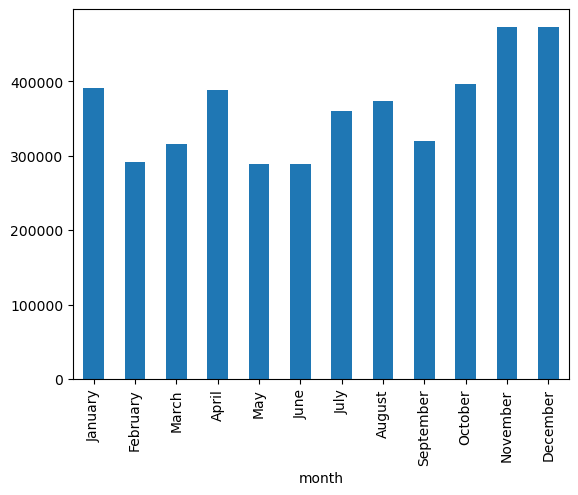

In [98]:
monthly_sales.plot.bar()

`matplotlib` is a widely used popular open source **visualization library** in Python. You can use it to make plots controlling **every single detail**. There are many other libraries out there, some of those based on `matplotlib`, that you can use to visualize data. Here is the [matplotlib website](https://matplotlib.org) if you want to learn more. We import the `pyplot` module of matplotlib with the convention name `plt`. There are two ways to use pyplot. The first one is similar to matlab, in a **function-like way**. The second one, and usually preffered, is the **object oriented way** which we'll be using.

In [99]:
import matplotlib.pyplot as plt

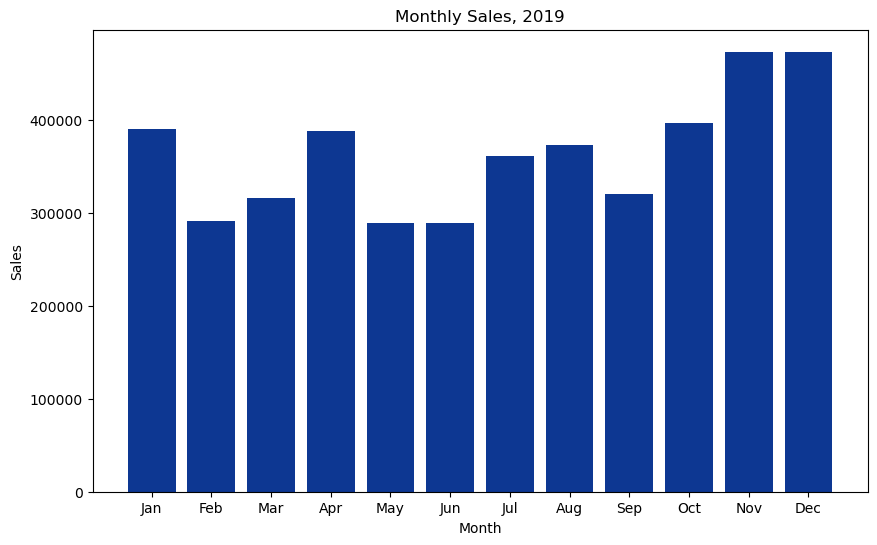

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))  # create a figure with width 10 inches and height 6 inches
ax.bar(x=monthly_sales.index, height=monthly_sales, color='#0D3792')  # create a bar chart with months in the x axis and the sales in the y axis
ax.set_xlabel('Month')  # set the x axis name to month
ax.set_ylabel('Sales')  # set the y axis name to sales
ax.set_title('Monthly Sales, 2019')  # give a title to the plot
_ = ax.set_xticks(ax.get_xticks(), labels=monthly_sales.index.str[:3])  # set the x axis tick labels to the first three letters of the month

Now we will make it a bit more complicated. We will group by `location` and `month` to see what's happening in terms of revenue. It still is very easy, we just pass a **list of columns** we want to group by.

In [115]:
location_month_sales = sales.groupby(by=['location', 'month'], observed=True)['product_revenue'].agg('sum')
location_month_sales

location       month    
California     January      145495.55
               February      84037.22
               March         89116.05
               April        117299.54
               May           81324.15
               June          90476.56
               July         115778.94
               August       111341.76
               September    104891.92
               October      111491.08
               November     131704.08
               December     165907.45
Chicago        January      106116.00
               February     101363.66
               March        107058.73
               April        147640.86
               May          102879.32
               June          90148.95
               July         126478.23
               August       146806.04
               September    120931.63
               October      131175.20
               November     161353.08
               December     173100.71
New Jersey     January       30617.18
               February  

It is the first time we see a `MultiIndex`. `MultiIndex` is just a more complex Index in our DataFrame. It might be a bit complicated at first, but `pandas` has tons of documentation on [Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html) and how to play with it.

We can also apply a number of aggregation functions.

In [120]:
sales.groupby(by='month', observed=True)['product_revenue'].agg(['sum', 'count', 'mean'])

,sum,count,mean
month,,,
January,390652.80,4063,96.148856
February,291395.49,3284,88.731879
March,315639.92,4346,72.627685
April,388177.43,4150,93.536730
May,288872.48,4572,63.182957
June,288910.57,4193,68.903069
July,360625.16,5251,68.677425
August,373098.89,6150,60.666486
September,320559.19,4288,74.757274


We can also give **names** to the aggregations, even if we use different columns.

In [124]:
sales.groupby(by=['location', 'gender'], observed=True).agg(average_tenure_months=('tenure_months', 'mean'),
                                                            average_revenue=('product_revenue', 'mean'),
                                                            unique_customers=('customer_id', 'nunique'))

average_tenure_months  average_revenue  unique_customers
location      gender                                                          
California    Female              25.292658        85.474273               299
              Male                29.261620        80.627032               165
Chicago       Female              26.993992        82.100350               285
              Male                25.021897        82.977377               171
New Jersey    Female              25.990218        80.229103                97
              Male                25.959610        94.634972                52
New York      Female              24.294327        75.664662               213
              Male                25.700104        83.045607               111
Washington DC Female              24.285150       100.553562                40
              Male                29.111187        77.052769                35